In [1]:
import pandas as pd

In [2]:
df3_WS1T = pd.read_csv("engineering_AS_segment2_workflowS2_has_duration.csv",engine='python')

In [3]:
df3_WS1T.head(n=1)

,CASE_ID,WRKFLW_TSK_MAP_GROUPED,WRKFLW_TSK_MAP_DETAILED,PATH_CRDATETIME,ITEM_CRUSER,WRKFLW_ORG_TYPE_CRUSER,STATUS_ORDER,LATEST_STATUS,WRKFLW_PROCESS,QUERY_PART,...,SPK_CAT_TYPE_CD,BROAD_COURSE_LEVEL,DEGREETYPE,LIABILITY_CATEGORY_CD_RECODE,ORIG_LIABILITY_CATEGORY_CD_RECODE,OFFER_RELEASED_FG,OFFER_OUTCOME_CD,OFFER_CONDITIONS,time_used_str,time_used_second
0,741976|477777|732954,Send for Assessment,Send for Assessment,7/5/2019 16:30:14,741976,NaN,4,N,1. App to Assessment,Part 1 - Application ID Workflow,...,MCW,HDCW,Full Degree,AS,AS,NaN,NaN,N,3 days 21 hours 22 minutes 3 seconds,336123.0


In [4]:
#store unique WRKFLW_TSK_MAP_DETAILED
WRKFLW_TSK_MAP_DETAILED_list = df3_WS1T['WRKFLW_TSK_MAP_DETAILED'].tolist()
unique_WRKFLW_TSK_MAP_DETAILED_list = set(WRKFLW_TSK_MAP_DETAILED_list)
len(unique_WRKFLW_TSK_MAP_DETAILED_list)
unique_WRKFLW_TSK_MAP_DETAILED_list

{'AR - Created - Assessment information (Coursework) (1)',
 'AR - Created - Assessment information (Coursework) (2)',
 'AR - Created - Full application for Coursework program (1)',
 'AR - Created - Further information (1)',
 'AR - Created - Further information (2)',
 'AR - Created - Further information (3)',
 'AR - Created - Further information - Official Transcripts',
 'AR - Created - Further information Pearsons Test of English',
 'AR - Created - Further information � Preference order required as submitted multiple 1st prefer applications',
 'AR - Created - Grading scale',
 'AR - Created - Graduate Access Melbourne application form',
 'AR - Created - Payment of international application fee',
 'AR - Created - Personal statement (500 words)',
 'AR - Created - Specialisation (Master of Engineering)',
 'AR - Created - University of Melbourne Statement of Results / transcript',
 'AR - Not Satisfied - English language proficiency',
 'AR - Requested - Academic results for prior tertiary st

In [5]:
#store unique CASE_ID
ID_list = df3_WS1T['CASE_ID'].tolist()
unique_ID_list = set(ID_list)
len(unique_ID_list)

1843

In [6]:
#create dataframe columns->unique_WRKFLW_TSK_MAP_DETAILED row->unique_ID
df = pd.DataFrame(columns = unique_WRKFLW_TSK_MAP_DETAILED_list, index = unique_ID_list )
df

,AR - Created - Further information (3),AR - Satisfied - Academic results for prior tertiary studies,AR - Satisfied - Advanced Standing,OC - Reviewed - English language requirements,AR - Created - Graduate Access Melbourne application form,WITHDRAW & LOCK,Assessment Outcome - Not Successful,Release Triage Hold,Assessment Outcome - Successful,AR - Satisfied - Specialisation (Master of Information Technology),...,AR - Reviewed - Current enrolment at the University of Melbourne,Acacdemic - Assessment Decision - Qualified,AR - Created - Further information - Official Transcripts,AR - Created - Full application for Coursework program (1),AR - Created - University of Melbourne Statement of Results / transcript,AR - Satisfied - Full application for Coursework program (1),AR - Satisfied - Specialisation (Master of Information Systems),AR - Created - Further information Pearsons Test of English,Assessment Decision - Not Qualified,Assessment Decision - No Decision
1060955|415608|644287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
913117|553329|846415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
760160|574222|874533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1164593|554629|848340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910789|539388|825476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761786|539284|825307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586580|419138|649614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1019137|357967|557995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
817708|392801|611464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#sotre id as key and workflow detail of the id as value into dictionary
from collections import defaultdict
ID_WRKFLW_dict = defaultdict(list)
for i, j in zip(df3_WS1T.CASE_ID,df3_WS1T.WRKFLW_TSK_MAP_DETAILED):
    ID_WRKFLW_dict[i].append(j)
len(ID_WRKFLW_dict)

1843

In [8]:
#change the value
for key in ID_WRKFLW_dict.keys():
    for process in ID_WRKFLW_dict[key]:
            df.loc[key, process] = 1
zero_one_table = df.fillna(0)
zero_one_table

,AR - Created - Further information (3),AR - Satisfied - Academic results for prior tertiary studies,AR - Satisfied - Advanced Standing,OC - Reviewed - English language requirements,AR - Created - Graduate Access Melbourne application form,WITHDRAW & LOCK,Assessment Outcome - Not Successful,Release Triage Hold,Assessment Outcome - Successful,AR - Satisfied - Specialisation (Master of Information Technology),...,AR - Reviewed - Current enrolment at the University of Melbourne,Acacdemic - Assessment Decision - Qualified,AR - Created - Further information - Official Transcripts,AR - Created - Full application for Coursework program (1),AR - Created - University of Melbourne Statement of Results / transcript,AR - Satisfied - Full application for Coursework program (1),AR - Satisfied - Specialisation (Master of Information Systems),AR - Created - Further information Pearsons Test of English,Assessment Decision - Not Qualified,Assessment Decision - No Decision
1060955|415608|644287,0,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
913117|553329|846415,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
760160|574222|874533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1164593|554629|848340,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
910789|539388|825476,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761786|539284|825307,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
586580|419138|649614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019137|357967|557995,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
817708|392801|611464,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

features= list(unique_WRKFLW_TSK_MAP_DETAILED_list)
print(len(features))
features.remove('Assessment Outcome - Successful')
features.remove('Assessment Outcome - Not Successful')
print(len(features))

X=zero_one_table[features]
y=zero_one_table ['Assessment Outcome - Successful'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 70% training and 30% test

80
78


In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5,
                             random_state = 0)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

In [12]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
print(confusion_matrix(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

[[167  14]
 [ 14 266]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       181
           1       0.95      0.95      0.95       280

    accuracy                           0.94       461
   macro avg       0.94      0.94      0.94       461
weighted avg       0.94      0.94      0.94       461



In [14]:
# DOT data
from IPython.display import Image
from sklearn import tree
import pydotplus
fn=features
cn=['0', '1']
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

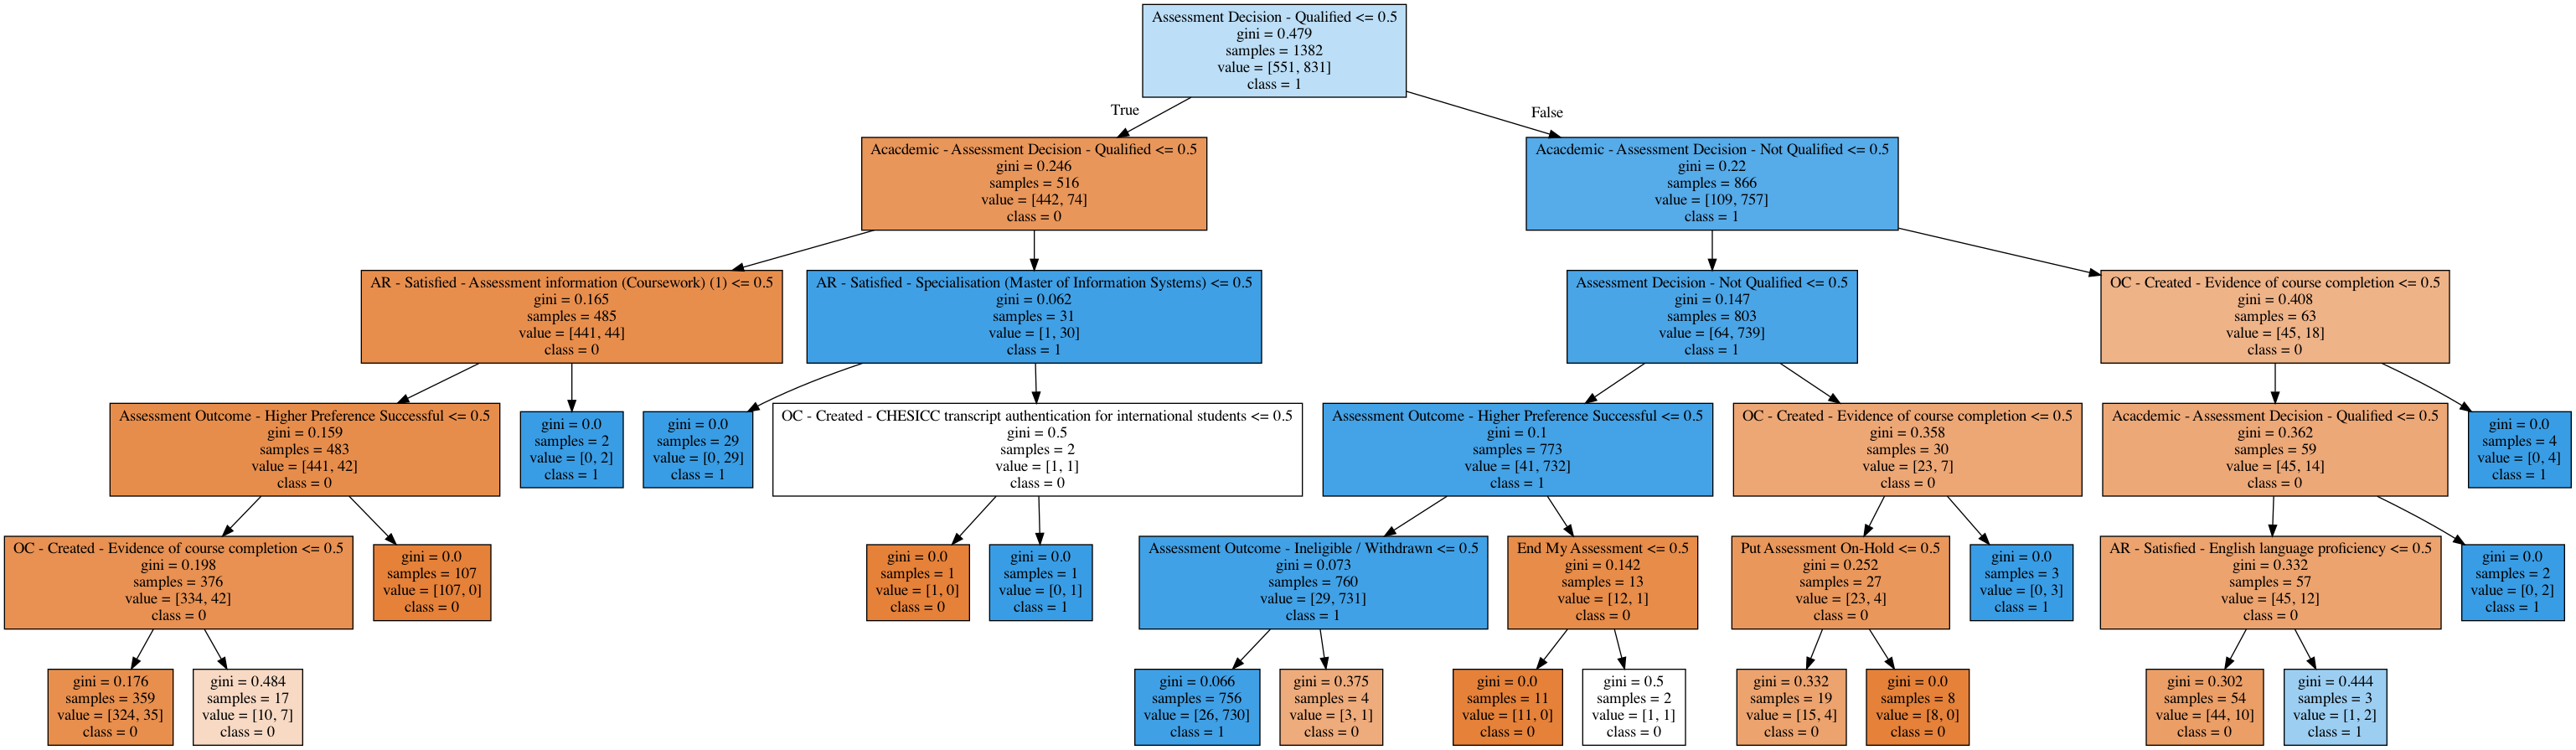

In [15]:
# Show graph
Image(graph.create_png())

In [16]:
# Create PNG
graph.write_png("engineering_AS_segment2_workflowS2_decisiontree.png")







True

In [17]:
zero_one_table['Assessment Outcome - Successful'].value_counts()

1    1111
0     732
Name: Assessment Outcome - Successful, dtype: int64

In [18]:
from sklearn.utils import resample

# Separate majority and minority classes
zero_one_table_majority = df[zero_one_table['Assessment Outcome - Successful']==1]
zero_one_table_minority = df[zero_one_table['Assessment Outcome - Successful']==0]

# Upsample minority class
df_majority_downsampled = resample(zero_one_table_majority,
                                 replace=False,     # sample with replacement
                                 n_samples=732,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_downsampled = pd.concat([zero_one_table_minority, df_majority_downsampled])

# Display new class counts
df_downsampled = df_downsampled.fillna(0)
df_downsampled['Assessment Outcome - Successful'].value_counts()

1    732
0    732
Name: Assessment Outcome - Successful, dtype: int64

In [19]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df_downsampled[features]
y=df_downsampled ['Assessment Outcome - Successful'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 70% training and 30% test

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 8,
                             random_state = 0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9344262295081968


In [21]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[177  12]
 [ 12 165]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       189
           1       0.93      0.93      0.93       177

    accuracy                           0.93       366
   macro avg       0.93      0.93      0.93       366
weighted avg       0.93      0.93      0.93       366



In [22]:
# DOT data
from IPython.display import Image
from sklearn import tree
import pydotplus
fn=features
cn=['0', '1']
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

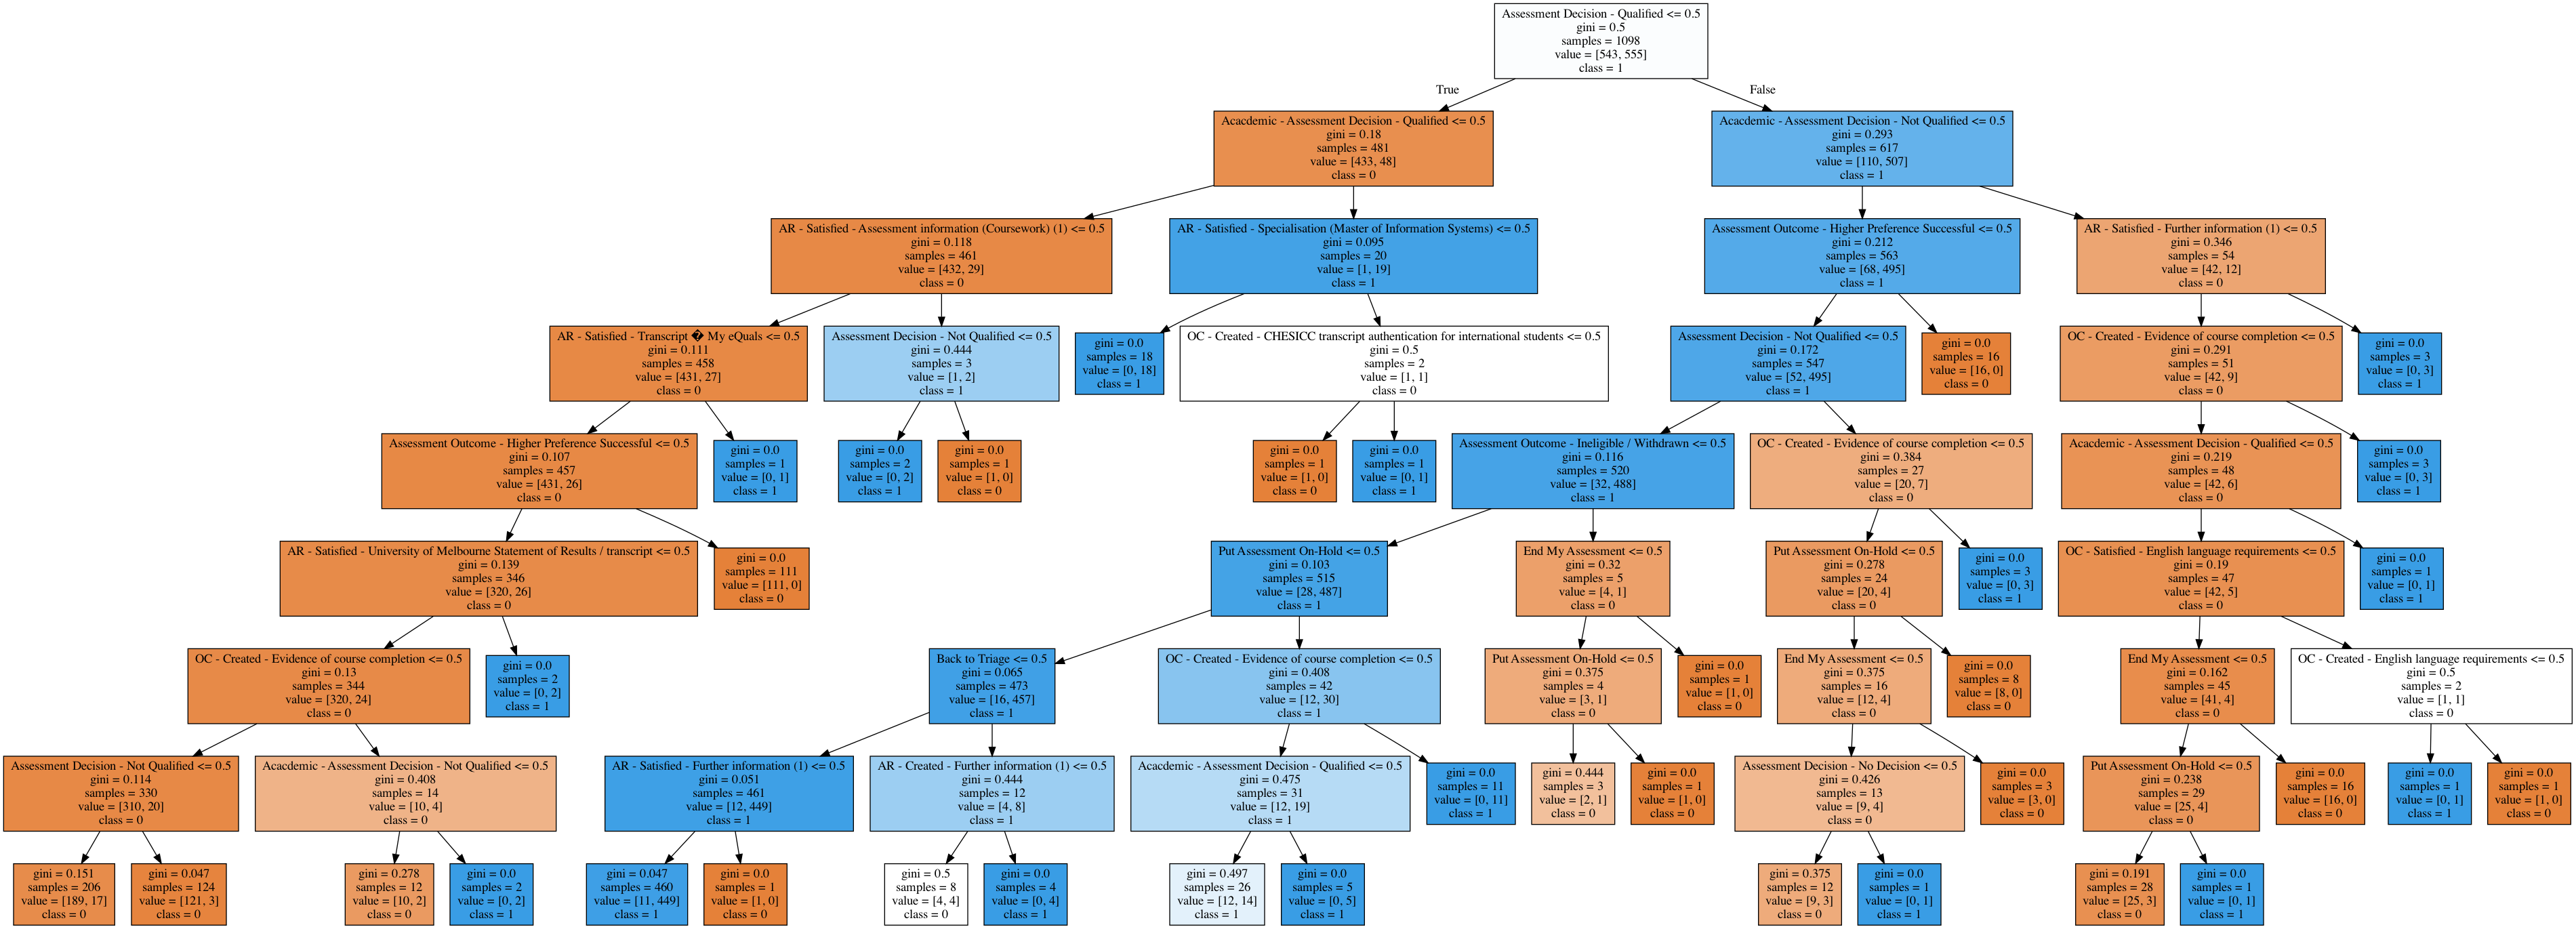

In [23]:
# Show graph
Image(graph.create_png())

In [24]:
# Create PNG
graph.write_png("engineering_AS_segment2_workflowS2_decisiontree_downsampled.png")

True